<h2>CS 4780/5780 Final Project: </h2>
<h3>COVID-19 Hospitalizations Prediction for EU Countries</h3>

Names and NetIDs for your group members: Rishi Malhotra (rm725), Maitreyi Chatterjee (mc2259), Ji Won Kim (jk2887)


<h3>Introduction:</h3>

<p> The final project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The programming project provide templates for how to do this, and the most recent video lectures summarize some of the tricks you will need (e.g. feature normalization, feature construction). So, this final project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is predicting hospitalizations due to COVID-19. Although hospitalizations are directly related to COVID-19 cases, the different populations, timelines and reactionary measures of different EU countries result in different trends in hospitalization numbers. In this project you will bring the power of machine learning to make predictions for the country-level hospitalizations using COVID-19 age group case data and also previous hospitalization data. There will be two tasks, one will be a basic problem that will require you to use methods learned in class. The second task will be more difficult and will require some additional intuition and insight. <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


![europe-second-wave-covid-promo-1604686277132-superJumbo.png]

(attachment:europe-second-wave-covid-promo-1604686277132-superJumbo.png)

<h2>Part 1: Basics</h2><p>

<h3>1.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib
import tqdm.notebook as tq
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount=True)
dir_path = 'drive/My Drive/cs4780_project'
# TODO
!pip install pytorch_lightning
import pytorch_lightning as pl

In [ ]:
import torch
import torchvision
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import tqdm.notebook as tq
from torch.utils.data import Dataset, DataLoader

In [ ]:
# !unzip drive/MyDrive/cs4780_project/datasets.zip -d drive/MyDrive/cs4780_project/

<h3>1.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy and mean squared error (MSE). As a recap, accuracy is the percent of labels you predict correctly and MSE is the average squared difference between the estimated values and the actual value. To measure this, you can use library functions from sklearn. A simple example is shown below. 
<p>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.42857142857142855

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

2.857142857142857

<h2>Part 2: Baseline Solution</h2><p>
Note that your code should be commented well and in part 2.4 you can refer to your comments.

<h3>2.1 Preprocessing and Feature Extraction:</h3><p>
Given the training dataset and graph information, you need to correctly preprocess the dataset (e.g. feature normalization). Think of what modifications can be done to the data to make it more easily interpretable.
<p>

In [ ]:
# You may change this but we suggest loading data with the following code and you may need to change
# datatypes and do necessary data transformation after loading the raw data to the dataframe.
# df = pd.read_csv(dataset_path, sep=',',header=None, encoding='unicode_escape')

# make a shortcut of the shared drive onto the real drive
dataset_path = "/content/drive/MyDrive/cs4780_project/train_baseline.csv"
train_baseline_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

dataset_path = "/content/drive/MyDrive/cs4780_project/test_baseline_no_label.csv"
test_baseline_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO

In [ ]:
train_baseline_df

,country,date,year_week,Daily hospital occupancy,under_15_cases,15-24_cases,25-49_cases,50-64_cases,65-79_cases,over_80_cases,next_week_increase_decrease
0,Belgium,3/15/2020,2020-W11,263,25,44,173,97,38,10,1
1,Belgium,3/16/2020,2020-W12,370,31,74,568,301,193,169,1
2,Belgium,3/17/2020,2020-W12,493,31,74,568,301,193,169,1
3,Belgium,3/18/2020,2020-W12,646,31,74,568,301,193,169,1
4,Belgium,3/19/2020,2020-W12,840,31,74,568,301,193,169,1
...,...,...,...,...,...,...,...,...,...,...,...
3980,Spain,2/19/2021,2021-W07,16314,7616,5561,16229,8305,4095,2267,0
3981,Spain,2/22/2021,2021-W08,15208,5714,4520,12951,6671,3241,1620,0
3982,Spain,2/24/2021,2021-W08,13495,5714,4520,12951,6671,3241,1620,0
3983,Spain,2/25/2021,2021-W08,12831,5714,4520,12951,6671,3241,1620,0


In [ ]:
print(f"Countries in the dataset: {train_baseline_df['country'].unique()}\n")
print(f"Year_weeks in the dataset: {train_baseline_df['year_week'].unique()}\n")

for col_name in ['under_15_cases', '15-24_cases', '25-49_cases','50-64_cases','65-79_cases','over_80_cases']:
    print(f"{col_name}: median: {train_baseline_df[col_name].median()}, mean: {train_baseline_df[col_name].mean()}, std: {train_baseline_df[col_name].std()}")


Countries in the dataset: ['Belgium' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Iceland'
 'Ireland' 'Italy' 'Lithuania' 'Netherlands' 'Norway' 'Portugal'
 'Slovenia' 'Spain']

Year_weeks in the dataset: ['2020-W11' '2020-W12' '2020-W13' '2020-W14' '2020-W15' '2020-W16'
 '2020-W17' '2020-W18' '2020-W19' '2020-W20' '2020-W21' '2020-W22'
 '2020-W23' '2020-W24' '2020-W25' '2020-W26' '2020-W27' '2020-W28'
 '2020-W29' '2020-W30' '2020-W31' '2020-W32' '2020-W33' '2020-W34'
 '2020-W35' '2020-W36' '2020-W41' '2020-W42' '2020-W43' '2020-W44'
 '2020-W45' '2020-W46' '2020-W47' '2020-W48' '2020-W53' '2021-W01'
 '2021-W02' '2021-W03' '2021-W04' '2021-W05' '2021-W06' '2021-W07'
 '2021-W08' '2021-W13' '2020-W09' '2020-W10' '2020-W07']

under_15_cases: median: 106.0, mean: 1316.4509410288583, std: 3500.121567763204
15-24_cases: median: 240.0, mean: 1762.3435382685068, std: 4022.626724134494
25-49_cases: median: 772.0, mean: 5470.972647427854, std: 12481.01224796851
50-64_cases: median: 368.0, me

<h3>2.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 1.1.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
train_baseline_raw = train_baseline_df.to_numpy()
test_baseline_raw = test_baseline_df.to_numpy()

In [ ]:
def get_bag_of_words(col):
  col_list = ['UNK'] + sorted(list(set(col)))
  indexed_col_list = [(el, idx) for idx, el in enumerate(col_list)]
  return dict(indexed_col_list)

In [ ]:
COUNTRIES = get_bag_of_words(train_baseline_raw[:,0])
DATES = get_bag_of_words(train_baseline_raw[:,1])
YEAR_WEEKS = get_bag_of_words(train_baseline_raw[:,2])
print(f"Countries: {COUNTRIES}")
print(f"Dates: {DATES}")
print(f"Year_weeks: {YEAR_WEEKS}")

In [ ]:
train_baseline_df.head()

,country,date,year_week,Daily hospital occupancy,under_15_cases,15-24_cases,25-49_cases,50-64_cases,65-79_cases,over_80_cases,next_week_increase_decrease
0,Belgium,3/15/2020,2020-W11,263,25,44,173,97,38,10,1
1,Belgium,3/16/2020,2020-W12,370,31,74,568,301,193,169,1
2,Belgium,3/17/2020,2020-W12,493,31,74,568,301,193,169,1
3,Belgium,3/18/2020,2020-W12,646,31,74,568,301,193,169,1
4,Belgium,3/19/2020,2020-W12,840,31,74,568,301,193,169,1


In [ ]:
def convert_year_week(year_week_str):
    """
    This converts the year_week column into an index (e.g, 2020-W01 -> 0). The index
    starts from week 1 of 2020 onwards. We convert it to an index because we want the
    classifier to take advantage of temporal information (via an index)
    :param: year_week_str (str) example: '2020-W01'
    :returns: week index (int) starting from 2020
    """
    year, week = year_week_str.split("-")
    return (int(year) - 2020) * 53 + int(week[1:])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()
train_baseline_raw[:, 3:10] = sscaler.fit_transform(train_baseline_raw[:, 3:10])
test_baseline_raw[:, 3:10] = sscaler.transform(test_baseline_raw[:, 3:10])

In [ ]:
class Baseline_Dataset(torch.utils.data.Dataset):
    """
    PyTorch Dataset object for loading in the baseline dataset.
    This normalizes the dataset and some other preprocessing techniques.
    """
    def __init__(self, baseline_raw, is_test):
        """
        Initializes the dataset object
        :param: baseline_raw (np.ndarray) contains the baseline data
        :param: is_test (bool) true/false to indicate whether it's the test set
        """
        self.baseline_raw = baseline_raw
        self.is_test = is_test

    def __len__(self):
        """
        Denotes the total number of samples
        :returns: length of dataset
        """
        return len(self.baseline_raw)

    def __getitem__(self, idx):
        """
        Generates one sample of the data (indexed by idx)
        :param: idx (int) index of data we are returning
        :returns: X (np.ndarray) input to neural network
        :returns: y (np.ndarray) output to neural network
        """

        if not self.is_test:
          X_raw = self.baseline_raw[idx,:-1]
        else:
          X_raw = self.baseline_raw[idx]

        # split the data into columns
        country, date, year_week, daily_hospital_occupancy,\
        under_15_cases, x15_24_cases, x25_49_cases, x50_64_cases,\
        x65_79_cases, over_80_cases = X_raw

        # create one-hot encoded version of countries
        country_num = torch.tensor(COUNTRIES.get(country, 0))
        country_ohc = F.one_hot(country_num, num_classes=len(COUNTRIES))

        # combine the dataset back together
        X = torch.tensor([convert_year_week(year_week)/66,
             daily_hospital_occupancy, under_15_cases, x15_24_cases, 
             x25_49_cases, x50_64_cases, x65_79_cases, over_80_cases])
        X = torch.cat((country_ohc, X))

        # for training 
        if not self.is_test:
          y = self.baseline_raw[idx,-1]
          return X.float(), torch.tensor(y).float()

        # test dataset
        return X.float()

<h3>2.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [ ]:
train_split = int(0.9 * len(train_baseline_raw))
val_split = len(train_baseline_raw) - train_split

# split the dataset
train_baseline_dataset = Baseline_Dataset(train_baseline_raw, is_test=False)
test_baseline_dataset = Baseline_Dataset(test_baseline_raw, is_test=True)
train_baseline_raw_split, val_baseline_raw_split = torch.utils.data.random_split(train_baseline_dataset, [train_split, val_split])

In [ ]:
# max index for the year_week_index
max_idx = 0
for x in range(train_baseline_raw.shape[0]):
  max_idx = max(max_idx, convert_year_week(train_baseline_raw[x, 2]))
max_idx

66

In [ ]:
class Neural_Net(nn.Module):
    """
    The Neural Network for predicting the baseline dataset
    """
    def __init__(self, input_length):
        """
        Initializes the neural network linear layers
        :param: input_length (int) the dimension of the input
        """
        super(Neural_Net, self).__init__()
        self.layer1 = nn.Linear(input_length, 1024)
        self.layer1b = nn.Linear(1024, 512)
        self.layer1c = nn.Linear(512, 256)
        self.layer2 = nn.Linear(256, 1)
        self.dropout = nn.Dropout(0.1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        """
        Computes forward pass of neural network
        :param: x (torch.Tensor) of the input
        :returns: y (torch.Tensor) the output of the NN
        """
        out = self.dropout(x)
        out = self.layer1(out)
        out = F.relu(out)

        out = self.dropout(out)
        out = self.layer1b(out)
        out = F.relu(out)

        out = self.dropout(out)
        out = self.layer1c(out)
        out = F.relu(out)

        out = self.dropout(out)
        out = self.layer2(out)
        out = self.sigmoid(out)

        return out

In [ ]:
def validate(network, loss_method, val_loader, do_print=False):
    """
    Computes the validation loss (and calculates other scores)
    :param: network (torch.nn.module) the neural network
    :param: loss_method torch loss function to analyze the loss of the validation ds
    :param: val_loader (dataloader) (see above)
    """
    preds, labels = [], []
    network.eval()
    for batch, label in val_loader:
        out = network(batch).detach().numpy().T
        preds += list(out[0])
        labels += label.detach().numpy().tolist()

    # something like this is preferable for computing the average loss.
    #   for X, y in val_loader:
    #     output = network(X) #.detach().numpy().T
    #     outputs = torch.argmax(output, axis=1)
    #     preds += outputs.tolist()
    #     labels += y.tolist()
    #     loss = loss_method(output, y)
    #     total_loss += loss
        
    # total_loss /= len(val_loader.dataset)


    # rounded prediction
    rounded = np.round(preds)
    accuracy = accuracy_score(labels, rounded)
    f1 = f1_score(labels, rounded)
    mse = mean_squared_error(labels, rounded)

    # prints for evaluation
    if do_print:
        print(f"Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count")
        print(f"------{preds.count(0)}------ ------{preds.count(1)}------  -------{labels.count(0)}------ ------{labels.count(1)}------")
        print({'accuracy':accuracy, 'mse':mse, 'f1':f1})
    
    # computes loss
    loss = loss_method(torch.tensor(preds).float(), torch.tensor(labels).float())
    return loss.item() 

In [ ]:
def train(network, train_loader, val_loader, loss_method, optimizer, path_prepend, \
          num_epochs=30, log_interval=300):
    """
    Trains the neural network (and evaluates on the validation dataset)
    :param: network (torch.nn.Module) created above
    :param: train_loader (torch.Dataset) for the training set
    :param: val_loader (torch.Dataset) for the validation set
    :param: loss_method (torch.loss) loss function for the neural network
    :param: optimizer (torch.optimizer) optimizer (we use adam/sgd)
    :param: path_prepend (str) path to where we save neural networks
    :param: num_epochs (int) number of epochs to train
    :returns: train_losses (list of float) list of training losses (through epochs)
    :returns: val_losses (list of float) list of validation losses (through epochs)
    """
    
    train_losses, val_losses = [], []
    for epoch in tq.tqdm(range(num_epochs)):
        network.train()
        epoch_loss = 0
        for batch_idx, (X, y) in enumerate(train_loader):
            optimizer.zero_grad()

            # computes network for the data point
            output = network(X)
            loss = loss_method(output.flatten(), y)
            epoch_loss += loss.item()

            loss.backward()
            optimizer.step()

        train_losses.append(epoch_loss/len(train_loader))
        val_loss = validate(network, loss_method, val_loader)
        val_losses.append(val_loss)

    # saves neural network
    if epoch % 50 == 0:
        torch.save(network.state_dict(), f"{path_prepend}/epoch_{epoch}")

    return train_losses, val_losses

In [ ]:
def plot_learning_curves(x, train_losses, val_losses):
    """
    Plots the learning curves through epochs.
    :param: x (list of ints) indicates where to plot the losses
    :param: train_losses (list of floats) losses with training data over epochs
    :param: train_losses (list of floats) losses with training data over epochs
    """
    plt.plot(x, train_losses, label="train_loss")
    plt.plot(x, val_losses, label="val_loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(top=1)
    plt.legend()

In [ ]:
# train hyperparameters
batch_size = 64
learning_rate = 5e-3
momentum = 0.9
input_length = len(train_baseline_dataset[0][0])
num_epochs = 400

train_baseline_loader = DataLoader(train_baseline_raw_split, batch_size=batch_size)
val_baseline_loader = DataLoader(val_baseline_raw_split, batch_size=batch_size)
test_baseline_loader = DataLoader(test_baseline_dataset, batch_size=batch_size)

# train the network
network = Neural_Net(input_length)
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
loss_method = nn.BCELoss()

path_prepend = "/content/drive/MyDrive/cs4780_project/checkpoints"
train_losses, val_losses = train(network, train_baseline_loader, val_baseline_loader, loss_method, optimizer,path_prepend,num_epochs)


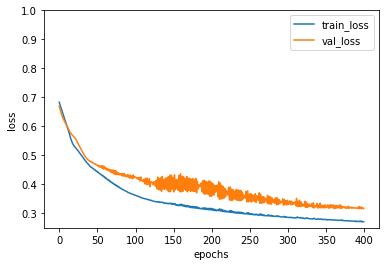

In [ ]:
plot_learning_curves(list(range(num_epochs)), train_losses, val_losses)

In [ ]:
# train loss
print("TRAIN LOSS")
validate(network, loss_method, train_baseline_loader, do_print=True)

TRAIN LOSS
Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------107------  -------2022------ ------1564------
{'accuracy': 0.8722810931399888, 'mse': 0.12771890686001117, 'f1': 0.8479415670650731}


0.2578454613685608

In [ ]:
# val loss
print("VAL LOSS")
validate(network, loss_method, val_baseline_loader, do_print=True)

VAL LOSS
Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------13------  -------235------ ------164------
{'accuracy': 0.8245614035087719, 'mse': 0.17543859649122806, 'f1': 0.7798742138364779}


0.31609317660331726

#### Baseline Solution 2

In [ ]:
def convert_year_week(year_week_str):
    """
    This converts the year_week column into an index (e.g, 2020-W01 -> 0). The index
    starts from week 1 of 2020 onwards. We convert it to an index because we want the
    classifier to take advantage of temporal information (via an index)
    :param: year_week_str (str) example: '2020-W01'
    :returns: week index (int) starting from 2020
    """
    year, week = year_week_str.split("-")
    return (int(year) - 2020) * 53 + int(week[1:])
def preprocess_adaboost_df(base_df, target_col='next_week_increase_decrease', test=True):
    """
    Removes the date/year_week columns, and expands the country into one-hot encoded variables.
    Returns an input numpy array, and an output numpy array
    :param: base_df (pd.DataFrame) base dataframe
    :returns: x (np.ndarray) contains all input variables
    :returns: y (np.ndarray) the target variable
    """
    needed_cols = ['date', 'year_week', 'country']
    drop_cols = needed_cols[:2]
    targety = None
    # handle train/test df
    if not test:
        needed_cols.append(target_col)
        drop_cols.append(target_col)
        targety = base_df[target_col].to_numpy()

    for col in needed_cols:
        assert col in base_df
        
    base_df['year_week_idx'] = base_df['year_week'].apply(convert_year_week)
    adjusted_df = base_df.drop(drop_cols, axis=1)
    adjusted_df = pd.get_dummies(adjusted_df, columns=['country'])

    return adjusted_df.to_numpy(), targety

In [ ]:
full_trainx, full_trainy = preprocess_adaboost_df(train_baseline_df, test=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import AdaBoostClassifier

# We utilize stratified kfold to analyze the predictive performance of our classifier
# and to calculate which 'n_estimators' parameter to utilize in our final output
n_estimators_param = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

hyperparam_dict = {x: [] for x in n_estimators_param}
skf = StratifiedKFold(random_state=53, shuffle=True)
for train_index, valid_index in skf.split(full_trainx, full_trainy):
  xtrain, xvalid = full_trainx[train_index], full_trainx[valid_index]
  ytrain, yvalid = full_trainy[train_index], full_trainy[valid_index]

  # train for each possible hyperparameter and calculate validation accuracy
  for n_estimator in n_estimators_param:
    adaboost = AdaBoostClassifier(n_estimators=n_estimator)
    adaboost.fit(xtrain, ytrain)
    accuracy = accuracy_score(yvalid, adaboost.predict(xvalid))
    hyperparam_dict[n_estimator] += [accuracy]
    
# create output dataframe
hyperparam_df = pd.DataFrame.from_dict(hyperparam_dict, orient='index')
hyperparam_df['avg'] = hyperparam_df.sum(axis=1) / 5
hyperparam_df

,0,1,2,3,4,avg
50,0.821832,0.791719,0.791719,0.804266,0.814304,0.804768
100,0.839398,0.821832,0.831870,0.841907,0.840652,0.835132
150,0.845671,0.826851,0.838143,0.856964,0.835634,0.840652
200,0.850690,0.848181,0.843162,0.863237,0.854454,0.851945
250,0.863237,0.851945,0.850690,0.873275,0.860728,0.859975
300,0.863237,0.848181,0.855709,0.877039,0.855709,0.859975
350,0.868256,0.858218,0.858218,0.879548,0.869511,0.866750
400,0.874529,0.863237,0.853199,0.880803,0.870765,0.868507
450,0.870765,0.872020,0.860728,0.885822,0.869511,0.871769
500,0.872020,0.868256,0.861982,0.884567,0.875784,0.872522


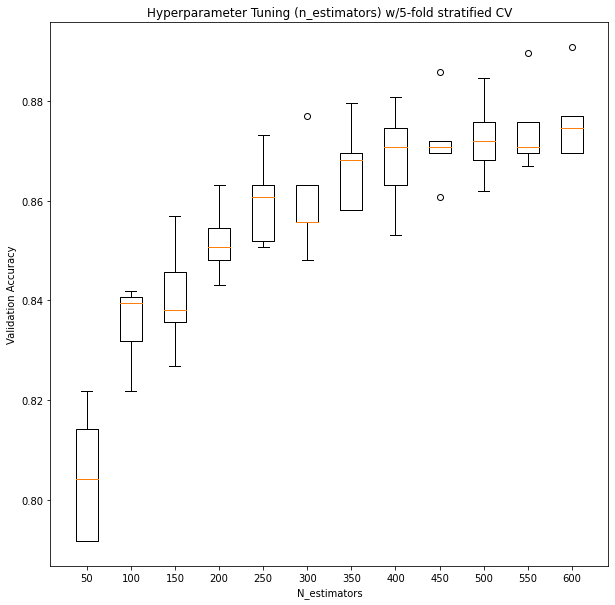

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title("Hyperparameter Tuning (n_estimators) w/5-fold stratified CV")
plt.xlabel("N_estimators")
plt.ylabel("Validation Accuracy")
plt.boxplot(hyperparam_df.iloc[:, :-1], positions=hyperparam_df.index, widths=25)
plt.show()

In [ ]:
def save_output(test_df, test_pred, fn=f'{dir_path}/preds/adaboost_take3.csv'):
    """
    Helper function that saves the output dataframe to a user-defined location
    :param: test_df (pd.DataFrame) dataframe of the test-set
    :param: test_pred (np.ndarray) the prediction made by the AdaBoost Classifier
    :param: fn (str) filename of the output dataframe
    """
    country_id = test_df['country'] + ' ' + test_df['date']
    output_df = pd.DataFrame({'country_id': country_id, 'next_week_increase_decrease': test_pred})
    output_df.set_index('country_id').to_csv(fn)

def train_fullmodel(n_estimators, full_trainx, full_trainy, test_baseline_df, \
                    fn=f'{dir_path}/preds/adaboost_take3.csv'):
    """
    After hyperparameter tuning, this function trains the AdaBoostClassifier with
    the best n_estimators value on the full dataset. The predictions are saved
    to a user-defined location
    :param: n_estimators (int) number of estimators utilized in AdaBoost
    :param: full_trainx (np.ndarray) input array of the full dataset
    :param: full_trainy (np.ndarray) output array of the full dataset
    :param: test_baseline_df (pd.DataFrame) dataframe of full dataset
    :param: fn (str) filename of the prediction output
    """
    adaboost = AdaBoostClassifier(n_estimators=n_estimators)
    adaboost.fit(full_trainx, full_trainy)

    testx, testy = preprocess_adaboost_df(test_baseline_df, test=True)
    test_pred = adaboost.predict(testx)

    save_output(test_baseline_df, test_pred, fn=fn)
  

In [ ]:
train_fullmodel(600, full_trainx, full_trainy, test_baseline_df, fn=f'{dir_path}/preds/adaboost_test.csv')

<h3>2.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

2.4.1 How did you preprocess the dataset and features, and how did you formulate the learning problem (or problems)?

**AdaBoost**: for the adaboost classifier, we removed the date column simply because it was a unique identifier for each row, which would allow the model to overfit easily. Instead, we utilized the year_week column, which we convert into an index (the `2020-W01` -> 0, `2020-W02` -> 1). The index allows the model to reason temporally because the weeks are inherently ordered, so utiling an index allows the model to utilize temporal information. Lastly, we converted the country column into a one-hot encoded version, simply because the `sklearn.models.AdaBoostClassifier` requires numeric values and countries don't have any inherent ordering. We note that decision trees are invariant to the scale of the features, so we don't scale the features for the Adaboost Learner.

**Neural Network**: for the neural network, the scale of the features does affect convergence, so we do scale some features. We also utilize an index (but scaled utilizing min-max scaling), we one-hot encode the country, and then we standard scale all the other columns. Just as we did for the AdaBoost, we removed the date column and converted the year_week columninto an index (the `2020-W01` -> 0, `2020-W02` -> 1)

The learning problem was simply formulated as a classification problem to utilize the features provided to predict whether or not the future week will have more or less hospitalizations.

2.4.2 Which two learning methods from class did you choose and why did you made the choices?

We chose **AdaBoost** because in practice AdaBoost/XGBoost tends to predict well with tabular data (as seen by the popularity of these approaches in Kaggle competitions). Because the data was formulated as a table with counts, we adopted to try AdaBoost to see if this relatively simple model can adequately predict for this particular task.

We chose **Neural Networks** because it's a popular algorithm for classification, and tends to work well in practice as long as there's sufficient data. 

2.4.3 How did you do the model selection?

For the **AdaBoost** model, we performed stratified k-fold validation and utilized the accuracy metric on the validation set. We perform this test for all hyperparameters we were interested in (`n_estimators`), and chose the hyperparameters that led to the highest average accuracy score to deal with overfitting. Then, we utilized the best set of hyperparameters, fit the model on the entire dataset, and then utilized that model for our final prediction.

For the **Neural Network** model, we did a simple training/validation split. We tested different neural networks with different number of hidden layers and different number of neurons in the hidden layers. We plotted training and validation error across the number of epochs (learning curves). We used these learning curvess to asssess whether we were underfitting or overfitting. In the case of overfitting, we increased dropout/reduced the expressability of the neural net and in case of underfitting, we added more layers/ more neurons to the layers in the neural network. We also used the train and validation curves to decide when to stop training without overfitting (early stopping).


2.4.4 Does the test performance reach a given baseline 70% performance? (Please include a screenshot of Kaggle Submission)

Yes, we did

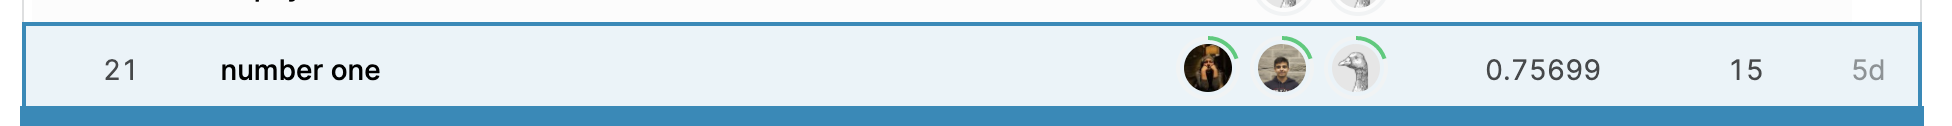


<h2>Part 3: Creative Solution</h2><p>

<h3>3.1 Open-ended Code:</h3><p>
You may follow the steps in part 2 again but making innovative changes like creating/using new features, using new training algorithms, etc. Make sure you explain everything clearly in part 3.2. Note that reaching the 150k MSE creative baseline is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

# Load the creative data

In [ ]:
# pytorch mlp for regression
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import numpy as np
import imageio

In [ ]:
dataset_path = "/content/drive/MyDrive/cs4780_project/train_creative.csv"
train_creative_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

dataset_path = "/content/drive/MyDrive/cs4780_project/train_baseline.csv"
train_baseline_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

dataset_path = "/content/drive/MyDrive/cs4780_project/train_creative_t_values.csv"
train_creative_t_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

dataset_path = "/content/drive/MyDrive/cs4780_project/test_creative_t_values.csv"
test_creative_t_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')

dataset_path = "/content/drive/MyDrive/cs4780_project/test_creative_no_label.csv"
test_creative_no_label_df = pd.read_csv(dataset_path, sep=',', encoding='unicode_escape')


In [ ]:
train_creative_raw = train_creative_df.to_numpy()
test_creative_raw = test_creative_no_label_df.to_numpy()
test_creative_t_raw = test_creative_t_df.to_numpy()
train_creative_t_raw = train_creative_t_df.to_numpy()

In [ ]:
sscaler = StandardScaler()
train_creative_raw[:, 3:10] = sscaler.fit_transform(train_creative_raw[:, 3:10])
test_creative_raw[:, 3:10] = sscaler.transform(test_creative_raw[:, 3:10])

sscaler = StandardScaler()
train_creative_t_raw[:, 3:54] = sscaler.fit_transform(train_creative_t_raw[:, 3:54])
test_creative_t_raw[:, 3:54] = sscaler.transform(test_creative_t_raw[:, 3:54])

In [ ]:
def get_new_weighted_feature(creative_t_raw, beta, k):
    """
    Computes an exponentially weighted t-value utilizing a given beta
    :param: creative_t_raw (np.ndarray) contains t-value dataframe
    :param: beta (float) beta for exponentially weighting
    :param: k (int) range that we are considering
    :returns: np.ndarray of the exponentially weighted 
    """

    beta_arr = np.array([beta**i for i in range(1,k+1)])
    weighted_averages = np.sum(creative_t_raw[:, 4:4+k] * beta_arr, axis=1)

    rows_with_missing_data = np.any(creative_t_raw[:, 4:4+k] == 0, axis=1)
    rows_with_no_missing_data = np.logical_not(rows_with_missing_data)

    original = creative_t_raw[:, 3]
    result = original * rows_with_missing_data + weighted_averages * rows_with_no_missing_data

    return np.atleast_2d(result).T

In [ ]:
class Creative_Dataset(torch.utils.data.Dataset):
    'Characterizes a  Creative dataset for PyTorch'
    def __init__(self, creative_raw, creative_t, geo_avg_feature, is_test):
        """
        Initializes the dataset object
        :param: creative_raw (np.ndarray) contains the creative data
        :param: creative_t (np.ndarray) contains the t-dataframe
        :param: geo_avg_feature (np.ndarray) contains the average of geographic cts
        :param: is_test (bool) true/false to indicate whether it's the test set
        """
        self.creative_raw = creative_raw
        self.is_test = is_test
        self.creative_t=creative_t
        self.geo_avg_feature = geo_avg_feature


    def __len__(self):
        """
        Denotes the total number of samples
        :returns: length of dataset
        """
        return len(self.creative_raw)

    def __getitem__(self, idx):
        """
        Generates one sample of the data (indexed by idx)
        :param: idx (int) index of data we are returning
        :returns: X (np.ndarray) input to neural network
        :returns: y (np.ndarray) output to neural network
        """

        if not self.is_test:
            X_raw = self.creative_raw[idx,:-1]
        else:
            X_raw = self.creative_raw[idx]

        country, date, year_week, daily_hospital_occupancy,\
        under_15_cases, x15_24_cases, x25_49_cases, x50_64_cases,\
        x65_79_cases, over_80_cases = X_raw
        country_num = torch.tensor(COUNTRIES.get(country, 0))
        
        # computes t values and the ohc version of the country
        country_ohc = F.one_hot(country_num, num_classes=len(COUNTRIES))
        t_1=self.creative_t[idx][4]
        if (t_1==0):
            t_1=self.creative_t[idx][3]
        t_2=self.creative_t[idx][5]
        if (t_2==0):
            t_2= self.creative_t[idx][3]
        t_3=self.creative_t[idx][6]
        if (t_3==0):
            t_3= self.creative_t[idx][3]

        geo_avg_feature = self.geo_avg_feature[idx]

        # concatenate all the features together
        X = torch.tensor([convert_year_week(year_week)/66,
             daily_hospital_occupancy, under_15_cases, x15_24_cases, 
             x25_49_cases, x50_64_cases, x65_79_cases, over_80_cases, t_1, t_2, geo_avg_feature])#,rolling_avg,t_1,t_2])

        X = torch.cat((country_ohc, X))
        

        if not self.is_test:
            y = self.creative_raw[idx,-1]
            return X.float(), torch.tensor(y).float()
          
        return X.float()

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_length):
        """
        Initializes the neural network linear layers
        :param: input_length (int) the dimension of the input
        """
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_length, 256)
        self.layer1b = nn.Linear(256,128)

        self.layer2 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.5)
      
    def forward(self, x):
        """
        Computes forward pass of neural network
        :param: x (torch.Tensor) of the input
        :returns: y (torch.Tensor) the output of the NN
        """
        out = self.dropout(x)
        out = self.layer1(out)
        out = F.relu(out)

        out = self.dropout(out)
        out = self.layer1b(out)
        out = F.relu(out)

        out = self.dropout(out)
        out = self.layer2(out)  
        return out

In [ ]:
def print_grads(net):
    """
    Prints gradients of neural network
    :param: net (nn.Module) the neural network
    """
    for name, param in net.named_parameters():
        print(name, param.grad)

In [ ]:
def train(network, train_loader, val_loader, loss_method, optimizer, \
          num_epochs=30, log_interval=300):
    """
    Trains the neural network (and evaluates on the validation dataset)
    :param: network (torch.nn.Module) created above
    :param: train_loader (torch.Dataset) for the training set
    :param: val_loader (torch.Dataset) for the validation set
    :param: loss_method (torch.loss) loss function for the neural network
    :param: optimizer (torch.optimizer) optimizer (we use adam/sgd)
    :param: path_prepend (str) path to where we save neural networks
    :param: num_epochs (int) number of epochs to train
    :returns: train_losses (list of float) list of training losses (through epochs)
    :returns: val_losses (list of float) list of validation losses (through epochs)
    """
    network.train()
    train_losses, val_losses = [], []
    for epoch in tq.tqdm(range(num_epochs)):
        epoch_loss = 0
        for batch_idx, (X, y) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(X)

            # computes loss and optimize
            loss = loss_method(output.flatten(), y)
            epoch_loss += loss.item() 
            loss.backward()
            nn.utils.clip_grad_norm_(network.parameters(), 1.0)
            
            optimizer.step()

        train_losses.append(epoch_loss/len(train_loader))
        val_loss = validate(network, loss_method, val_loader)
        val_losses.append(val_loss)

    return train_losses, val_losses

In [ ]:
batch_size = 64
learning_rate = 1e-2
momentum = 0.9

num_epochs = 100
k_for_geo_avg = 10
beta = 0.5

# scale the new feature #######
train_geo_avg_feature = get_new_weighted_feature(train_creative_t_raw, beta=beta, k=k_for_geo_avg)
test_geo_avg_feature = get_new_weighted_feature(test_creative_t_raw, beta=beta, k=k_for_geo_avg)

sscaler = StandardScaler()
train_geo_avg_feature = sscaler.fit_transform(train_geo_avg_feature)
test_geo_avg_feature = sscaler.transform(test_geo_avg_feature)
###############################

#make the dataset and loaders
train_split = int(0.9 * len(train_creative_raw))
val_split = len(train_creative_raw) - train_split
train_creative_dataset = Creative_Dataset(train_creative_raw, train_creative_t_raw, train_geo_avg_feature, False)
test_creative_dataset = Creative_Dataset(test_creative_raw, test_creative_t_raw, test_geo_avg_feature, True)
train_creative_raw_split, val_creative_raw_split = torch.utils.data.random_split(train_creative_dataset, [train_split, val_split])


input_length = len(train_creative_dataset[0][0])

train_creative_loader = DataLoader(train_creative_raw_split, batch_size=batch_size)
val_creative_loader = DataLoader(val_creative_raw_split, batch_size=batch_size)
test_creative_loader = DataLoader(test_creative_dataset, batch_size=batch_size)
###########################

#run the network
net_2 = MLP(input_length)
optimizer = optim.SGD(net_2.parameters(), lr=learning_rate, momentum=momentum)
loss_method = nn.MSELoss()
train_losses, val_losses = train(net_2, train_creative_loader, val_creative_loader, loss_method, optimizer,num_epochs)

In [ ]:
train_losses, val_losses = train(net_2, train_creative_loader, val_creative_loader, loss_method, optimizer,100)

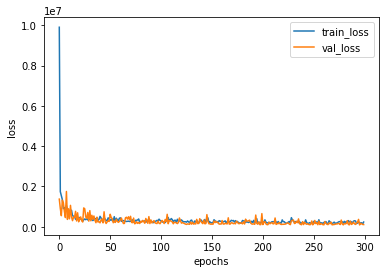

In [ ]:
plot_learning_curves(list(range(len(train_losses))), train_losses, val_losses)

In [ ]:
# K IS 10
validate(net_2, loss_method, val_creative_loader, do_print=True)

Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------0------  -------11------ ------5------
{'accuracy': 0.007518796992481203, 'mse': 120222.34837092731, 'f1': 0.007518796992481203}


120237.5703125

In [ ]:
# K IS 10 beta is 0.9
validate(net_2, loss_method, val_creative_loader, do_print=True)

Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------0------  -------17------ ------6------
{'accuracy': 0.02506265664160401, 'mse': 133847.2180451128, 'f1': 0.02506265664160401}


133851.515625

In [ ]:
# K IS 10 beta is 0.9 dropout is 0.5
validate(net_2, loss_method, val_creative_loader, do_print=True)

Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------0------  -------8------ ------2------
{'accuracy': 0.005012531328320802, 'mse': 154074.64160401002, 'f1': 0.005012531328320802}


154078.5625

In [ ]:
# K IS 10 beta is 0.9
validate(net_2, loss_method, val_creative_loader, do_print=True)

Preds 0 count | Preds 1 count | Labels 0 count | Labels 1 count
------0------ ------0------  -------19------ ------6------
{'accuracy': 0.017543859649122806, 'mse': 57857.203007518794, 'f1': 0.017543859649122806}


57854.53125

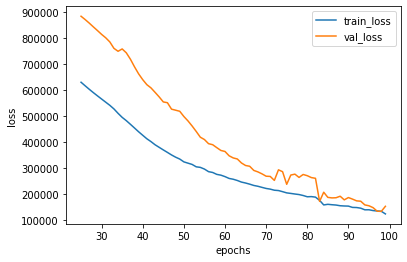

In [ ]:
# K IS 10 beta is 0.9
plot_learning_curves(list(range(25, len(train_losses))), train_losses[25:], val_losses[25:])

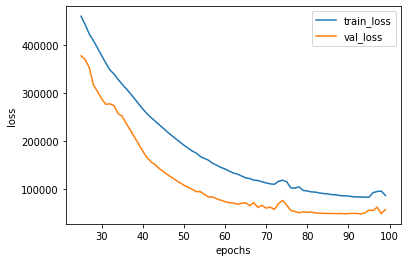

In [ ]:
# K IS 10. beta is 0.9 dropout is 0.5
plot_learning_curves(list(range(25, len(train_losses))), train_losses[25:], val_losses[25:])

In [ ]:
num_epochs = 50
train_losses, val_losses = train(net_2, train_creative_loader, val_creative_loader, loss_method, optimizer,num_epochs)

<h3>3.2 Explanation in Words:</h3><p>

You need to answer the following questions in a markdown cell after this cell:

3.2.1 How much did you manage to impssssssssssssssssssssssssssssssssssssssssssrove performance on the test set? Did you reach the 150k MSE for the test in Kaggle? (Please include a screenshot of Kaggle Submission)

We reached a 91809 MSE( 91k MSE) on the test set. Yes we reached the 150k MSE for the test in Kaggle.
Here is a screenshot of our submission.

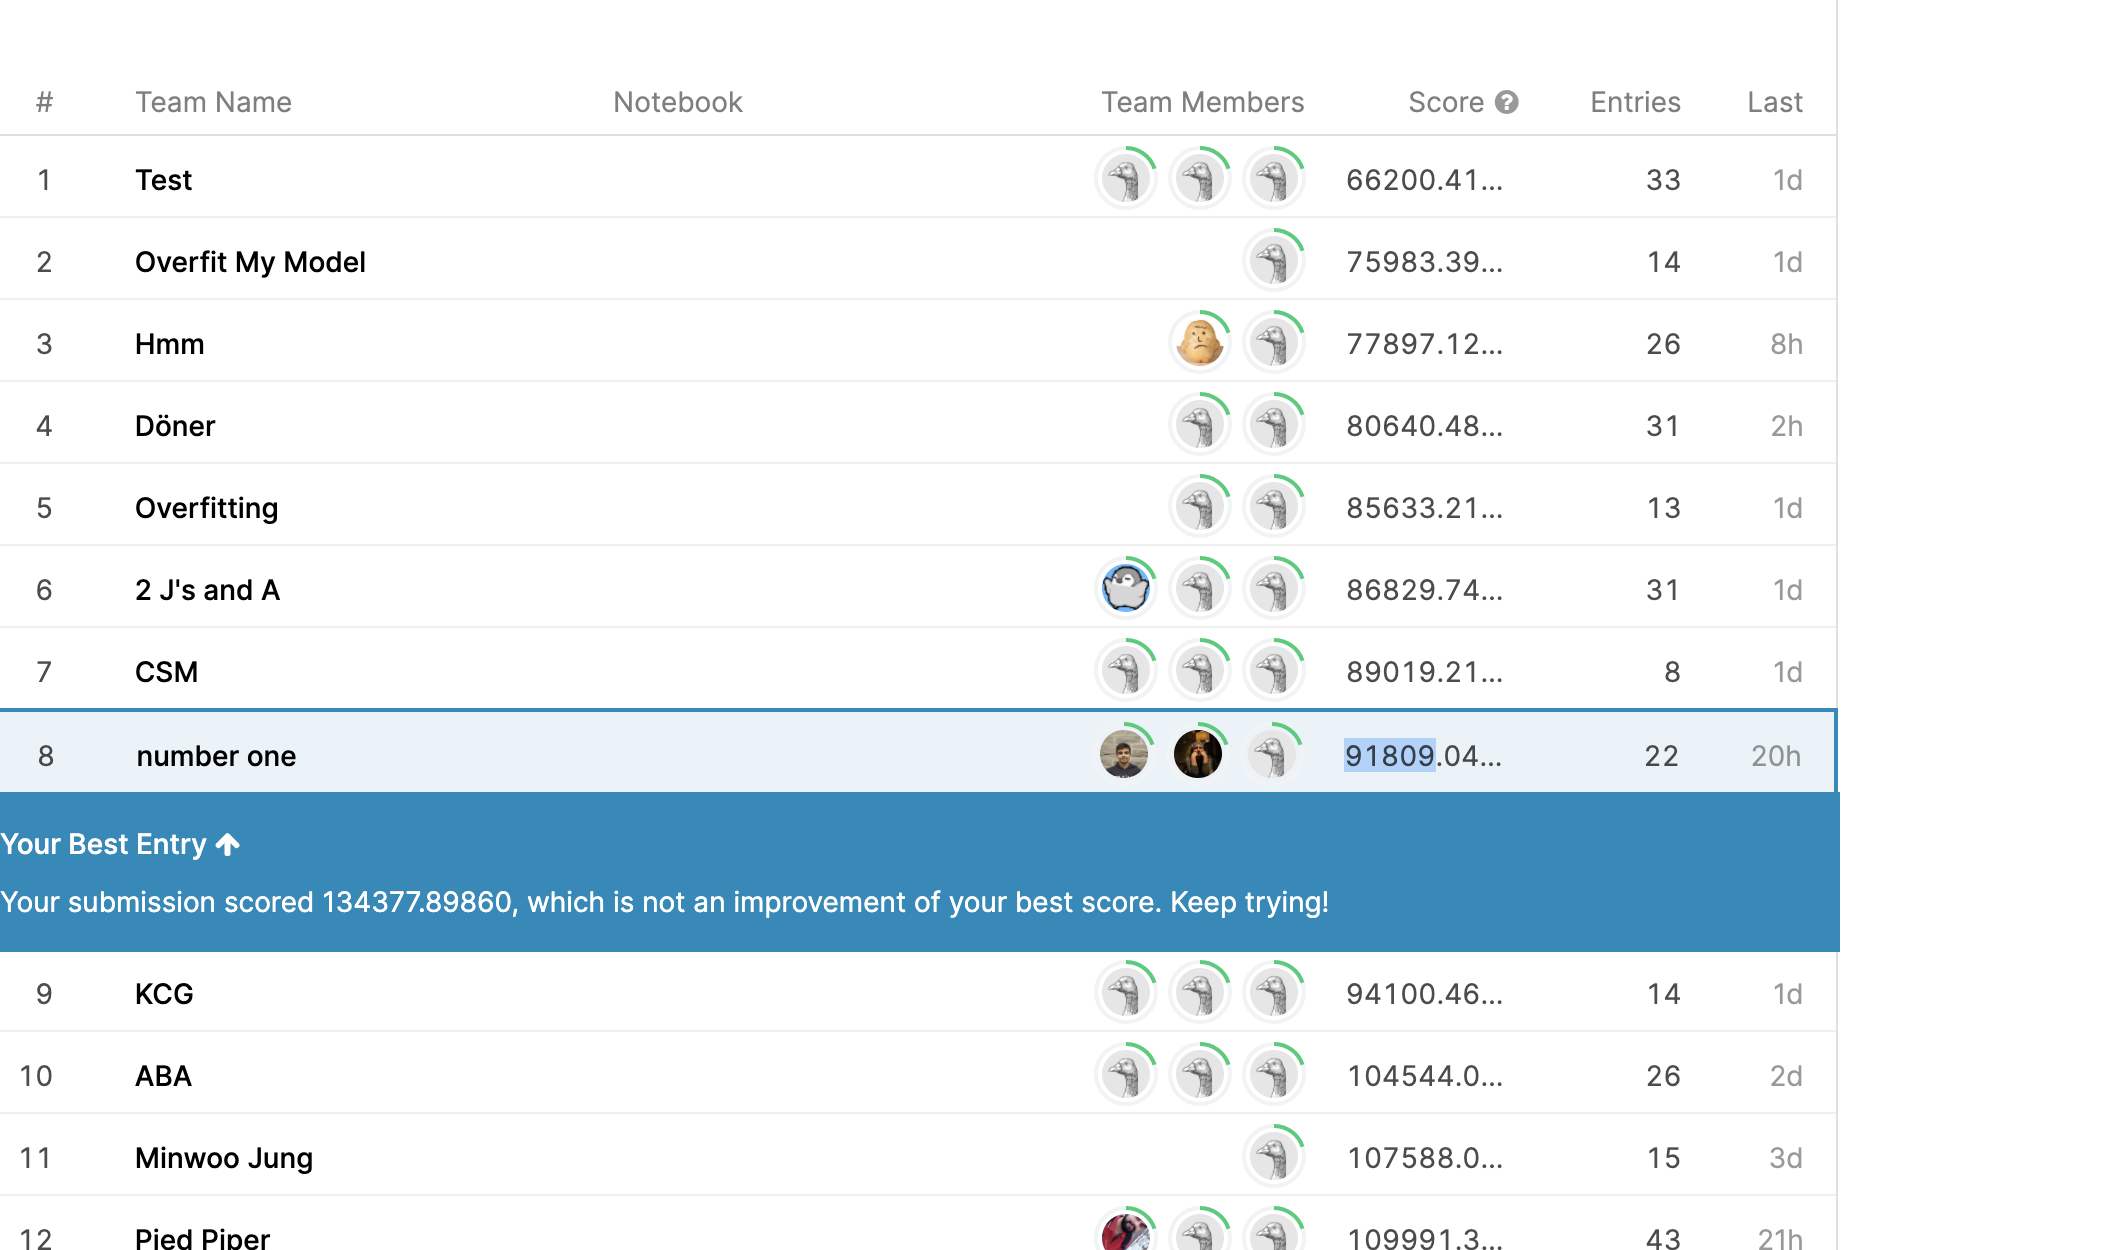

3.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.






We acheived this by using several strategies:

##1. Feature Engineering:
   We used a weighted rolling average of k t-values with weights B = [b, b^2, ..., b^k] . where b < 1. (b is referred to as beta in the code).
   For any row in the dataset with non-0 t_values T = [t_1, ..., t_k], our weighted average feature w = B * transpose(T) = t_1*b + t_2*b^2 + t_3*b^3 +...+ t_k*b^k.

   In the case of 0 t-values W = daily_hospital_occupancy for that day. We did this to minmize noise from missing t-values data in our dataset.
   
   The intution behind that was that the past daily hospitalisation rates in a country would affect the future daily hospitalisation rates in a country. The average was weighted because t-values closer to the present date are more important for the current prediction than hospitalizations further from the present date. We started with a normal rolling average which did not perform well, so we switched to a weighted rolling average instead.


##2. Feature Preprocesing and Normalisation:

We faced exploding gradients which we solved using gradient clipping.
We also had to normalise all our features including the W feature we engineered to make sure that the neural network converged properly to solve the problem of spiky loss functions. We also dropped the date since it was a unique identifier for each row in the dataset and serialized the year-week using the same method as in the classification one.

##3. Network architecture. 

We used mean-square error loss for the regression problem since this is the most common error used for regression problems.

We had hyperparameters (number of layers, number of neurons in each layer, dropout, the learning rate, momentum etc.) This time we also had the additional hyperparameters b (beta) and k. These were the hyperparameters used to create our rolling weighted-avg feature. We spent a long time tuning hyperparameters and plotting graphs to figure out whether our model was overfitting or underfitting and fixing the network architecture accordingly. Some of the graphs we plotted are shown above. They show the training and test error against the number of epochs.

We used these graphs to diagnose overfitting and underfitting. In the case of overfitting (validation error >> training error), we increased dropout, made the neural network less expressive, used early stopping in training etc. In the case of underfitting (high training error), we made our neural network more expressive.





<h2>Part 4: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The CSV shall contain TWO columns. The first column should be named "country_id" and be a concatenation of the country and date in the first two columns of the test_no_label.csv. This is because for the Kaggle competition we need a unique identifier for every row. For instance, the first entry should be "Belgium 9/7/2020". The second column of the prediction csv should have the same name as the target metric (either "next_week_increase_decrease" or "next_week_hospitalizations") with your generated predictions. Your file should have 1144 total rows excluding the column names. The order should be the same as in the test_baseline/creative_no_label.csv. A sample predication file can be downloaded from Kaggle for each problem.

In [ ]:
# baseline solution
a = next(iter(test_baseline_loader))
PATH_TO_SAVE = "/content/drive/MyDrive/cs4780_project/preds"
def test_model_baseline(network, test_loader, filename):
    """
    Return results and write them to the filename
    :param: network (torch.nn.Module) neural network for baseline
    :param: test_loader (torch.Dataset) loader for test set
    :param: filename (str) filename to save results
    """
    network.eval()
    result = []
    for batch in test_loader:
        out = network(batch).detach().numpy().T
        result += np.round(out).astype(int).tolist()[0]

    final_df = (test_baseline_df['country'] + ' ' + test_baseline_df['date']).to_frame(name="country_id")
    final_df['next_week_increase_decrease'] = result
  
    final_df.to_csv(f"{PATH_TO_SAVE}/{filename}.csv", index=False)
    return final_df

final_df = test_model_baseline(network, test_baseline_loader, "neural_nets_take_13")

In [ ]:
# creative solution
PATH_TO_SAVE = "/content/drive/MyDrive/cs4780_project/preds"
def test_model_creative(network, test_loader, filename):
    """
    Return results and write them to the filename
    :param: network (torch.nn.Module) neural network for baseline
    :param: test_loader (torch.Dataset) loader for test set
    :param: filename (str) filename to save results
    """
    result = []
    network.eval()
    for batch in test_loader:
        out = network(batch).detach().numpy().T
        result +=np.round(out).astype(int).tolist()[0]

    final_df = (test_baseline_df['country'] + ' ' + test_baseline_df['date']).to_frame(name="country_id")
    final_df['next_week_hospitalizations'] = result
  
    final_df.to_csv(f"{PATH_TO_SAVE}/{filename}.csv", index=False)
    return final_df

In [ ]:
final_df = test_model_creative(net_2, test_creative_loader, "expressive_deep_model")

<h2>Part 5: Resources and Literature Used</h2><p>

We utilized PyTorch for the neural network, sci-kit learn for AdaBoost (and for other preprocessing functions). We lastly utilize pandas to readi n the data and to save our data.